# Mini-Project: Selecting features


## Note: this needs some polishing up

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.


## Objective
The goal is to apply feature engineering methods to preprocess the data, perform feature selection, and evaluate how feature engineering and selection affect the performance of a predictive model.


## Steps
1. Import the relevant libraries for data analysis, visualisation, and machine learning.
2. Explore the data set to understand the features.
3. Preprocess the data, handling missing values and encoding categorical variables as needed.
4. Apply feature scaling.
5. Determine if there is multicollinearity.
6. Determine the importance of features with MI and perform feature selection with RFE.
7. Create a heatmap to evaluate possible correlation coefficients.
8. Create target and input features DataFrames.
9. Determine feature importance and perform feature selection.

In [ ]:
# Start your activity here:

# Step 1: Import the required librar}es.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"



In [ ]:
x = pd.read_csv(url)

In [ ]:
x.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(x.shape)
print("\n")
x.info()

(205, 26)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null  

no missing values


In [ ]:
# Step 1: Identify categorical columns
categorical_columns = x.select_dtypes(include=['object', 'category']).columns
'''
# Step 2: View unique entries in each categorical column
for col in categorical_columns:
    print(f"Unique entries in column '{col}':")
    print(x[col].unique())
    print(f"Total number of unique entries in column '{col}':")
    print(len(x[col].unique()))
    print("\n")
'''

'\n# Step 2: View unique entries in each categorical column\nfor col in categorical_columns:\n    print(f"Unique entries in column \'{col}\':")\n    print(x[col].unique())\n    print(f"Total number of unique entries in column \'{col}\':")\n    print(len(x[col].unique()))\n    print("\n")\n'

In [ ]:
#drop car_id
x = x.drop('car_ID', axis=1)

In [ ]:
#split out brand

x['brand'] = x['CarName'].apply(lambda x: x.split(' ')[0])

#check this column
x['brand'].astype('category').value_counts()

,count
brand,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
dodge,9


In [ ]:
#drop CarName
x = x.drop('CarName', axis=1)

x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
#encode categorical variables]

#ordinal
x['cylindernumber'] = x['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})
x['doornumber'] = x['doornumber'].map({'two':2, 'four':4})

x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
brand_counts = x['brand'].value_counts()

threshold = 10
x['brand_encoded'] = x['brand'].apply(lambda x: x if brand_counts[x] >= threshold else 'other')



x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_encoded
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,other
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,other
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,other
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,other
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,other


In [ ]:
#intialize One-Hot-Encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#apply one-hot to categorical columns
one_hot_encoded = encoder.fit_transform(x[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'brand_encoded']])

#create df with one-hot columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'brand_encoded']))

#concatenate original df with one-hot df
x = pd.concat([x, one_hot_df], axis=1)

#drop original categorical columns
x = x.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'brand_encoded', 'brand'], axis=1)

x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_spfi,brand_encoded_honda,brand_encoded_mazda,brand_encoded_mitsubishi,brand_encoded_nissan,brand_encoded_other,brand_encoded_peugeot,brand_encoded_subaru,brand_encoded_toyota,brand_encoded_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_spfi,brand_encoded_honda,brand_encoded_mazda,brand_encoded_mitsubishi,brand_encoded_nissan,brand_encoded_other,brand_encoded_peugeot,brand_encoded_subaru,brand_encoded_toyota,brand_encoded_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Now feature scaling
x.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_spfi,brand_encoded_honda,brand_encoded_mazda,brand_encoded_mitsubishi,brand_encoded_nissan,brand_encoded_other,brand_encoded_peugeot,brand_encoded_subaru,brand_encoded_toyota,brand_encoded_volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,...,0.004878,0.063415,0.073171,0.063415,0.082927,0.400000,0.053659,0.058537,0.15122,0.053659
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,...,0.069843,0.244304,0.261054,0.244304,0.276447,0.491097,0.225894,0.235330,0.35914,0.225894
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
# Features to scale
columns_to_scale = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Initialize the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

print(x.head())


   symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2   0.058309   0.413433  0.316667   0.083333   
1          3           2   0.058309   0.413433  0.316667   0.083333   
2          1           2   0.230321   0.449254  0.433333   0.383333   
3          2           4   0.384840   0.529851  0.491667   0.541667   
4          2           4   0.373178   0.529851  0.508333   0.541667   

   curbweight  cylindernumber  enginesize  boreratio  ...  fuelsystem_spfi  \
0    0.411171               4    0.260377   0.664286  ...              0.0   
1    0.411171               4    0.260377   0.664286  ...              0.0   
2    0.517843               6    0.343396   0.100000  ...              0.0   
3    0.329325               4    0.181132   0.464286  ...              0.0   
4    0.518231               5    0.283019   0.464286  ...              0.0   

   brand_encoded_honda  brand_encoded_mazda  brand_encoded_mitsubishi  \
0                  0.0         

In [ ]:
#split out price
#make target variable
X = x.drop('price', axis=1)
y = x['price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare a DataFrame for VIF calculation
X_vif = X.copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF data
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     Feature         VIF
0                  symboling    4.081806
1                 doornumber    3.570196
2                  wheelbase   14.536911
3                  carlength   15.368241
4                   carwidth    9.313423
5                  carheight    4.460135
6                 curbweight   32.792032
7             cylindernumber   20.593434
8                 enginesize   47.876811
9                  boreratio    8.035633
10                    stroke    3.236777
11          compressionratio  137.449431
12                horsepower   27.917893
13                   peakrpm    4.271693
14                   citympg   39.502459
15                highwaympg   37.260126
16           fueltype_diesel         inf
17              fueltype_gas         inf
18            aspiration_std         inf
19          aspiration_turbo         inf
20       carbody_convertible         inf
21           carbody_hardtop         inf
22         carbody_hatchback         inf
23             c

In [ ]:
X_processed = X.drop(columns=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'], axis=1)
X_processed.head()

,symboling,doornumber,carheight,cylindernumber,stroke,compressionratio,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,...,fuelsystem_spfi,brand_encoded_honda,brand_encoded_mazda,brand_encoded_mitsubishi,brand_encoded_nissan,brand_encoded_other,brand_encoded_peugeot,brand_encoded_subaru,brand_encoded_toyota,brand_encoded_volvo
0,3,2,0.083333,4,0.290476,0.1250,0.346939,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2,0.083333,4,0.290476,0.1250,0.346939,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,2,0.383333,6,0.666667,0.1250,0.346939,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,4,0.541667,4,0.633333,0.1875,0.551020,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,4,0.541667,5,0.633333,0.0625,0.551020,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Now for MI
# when target variable y is categorical use:
# from sklearn.feature_selection import mutual_info_classif


from sklearn.feature_selection import mutual_info_regression


# Define the discrete_features
discrete_features = [True if X_processed[col].dtype == 'object' or X_processed[col].dtype.name == 'category' else False for col in X_processed.columns]

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_processed, y, discrete_features)


# View the MI score. 0 indicates two variables are independent, higher values
# mean higher dependency
print(mi_scores)



stroke                      3.682110e-01
carheight                   3.563663e-01
cylindernumber              3.444473e-01
fuelsystem_2bbl             3.273471e-01
drivewheel_fwd              3.188995e-01
fuelsystem_mpfi             3.159448e-01
drivewheel_rwd              3.150165e-01
symboling                   2.080868e-01
peakrpm                     1.939980e-01
compressionratio            1.808764e-01
brand_encoded_other         1.107978e-01
enginetype_ohc              1.021314e-01
aspiration_turbo            9.698648e-02
aspiration_std              9.698648e-02
carbody_hatchback           7.686430e-02
brand_encoded_peugeot       7.228276e-02
enginetype_l                6.365162e-02
enginetype_ohcv             5.415897e-02
brand_encoded_toyota        4.432835e-02
brand_encoded_volvo         3.837656e-02
fueltype_diesel             3.603132e-02
fueltype_gas                3.603132e-02
fuelsystem_idi              3.603132e-02
fuelsystem_1bbl             3.440808e-02
brand_encoded_su

In [ ]:
#so at this stage you can do the correlation heatmap also and cross check with high MI values if wanted

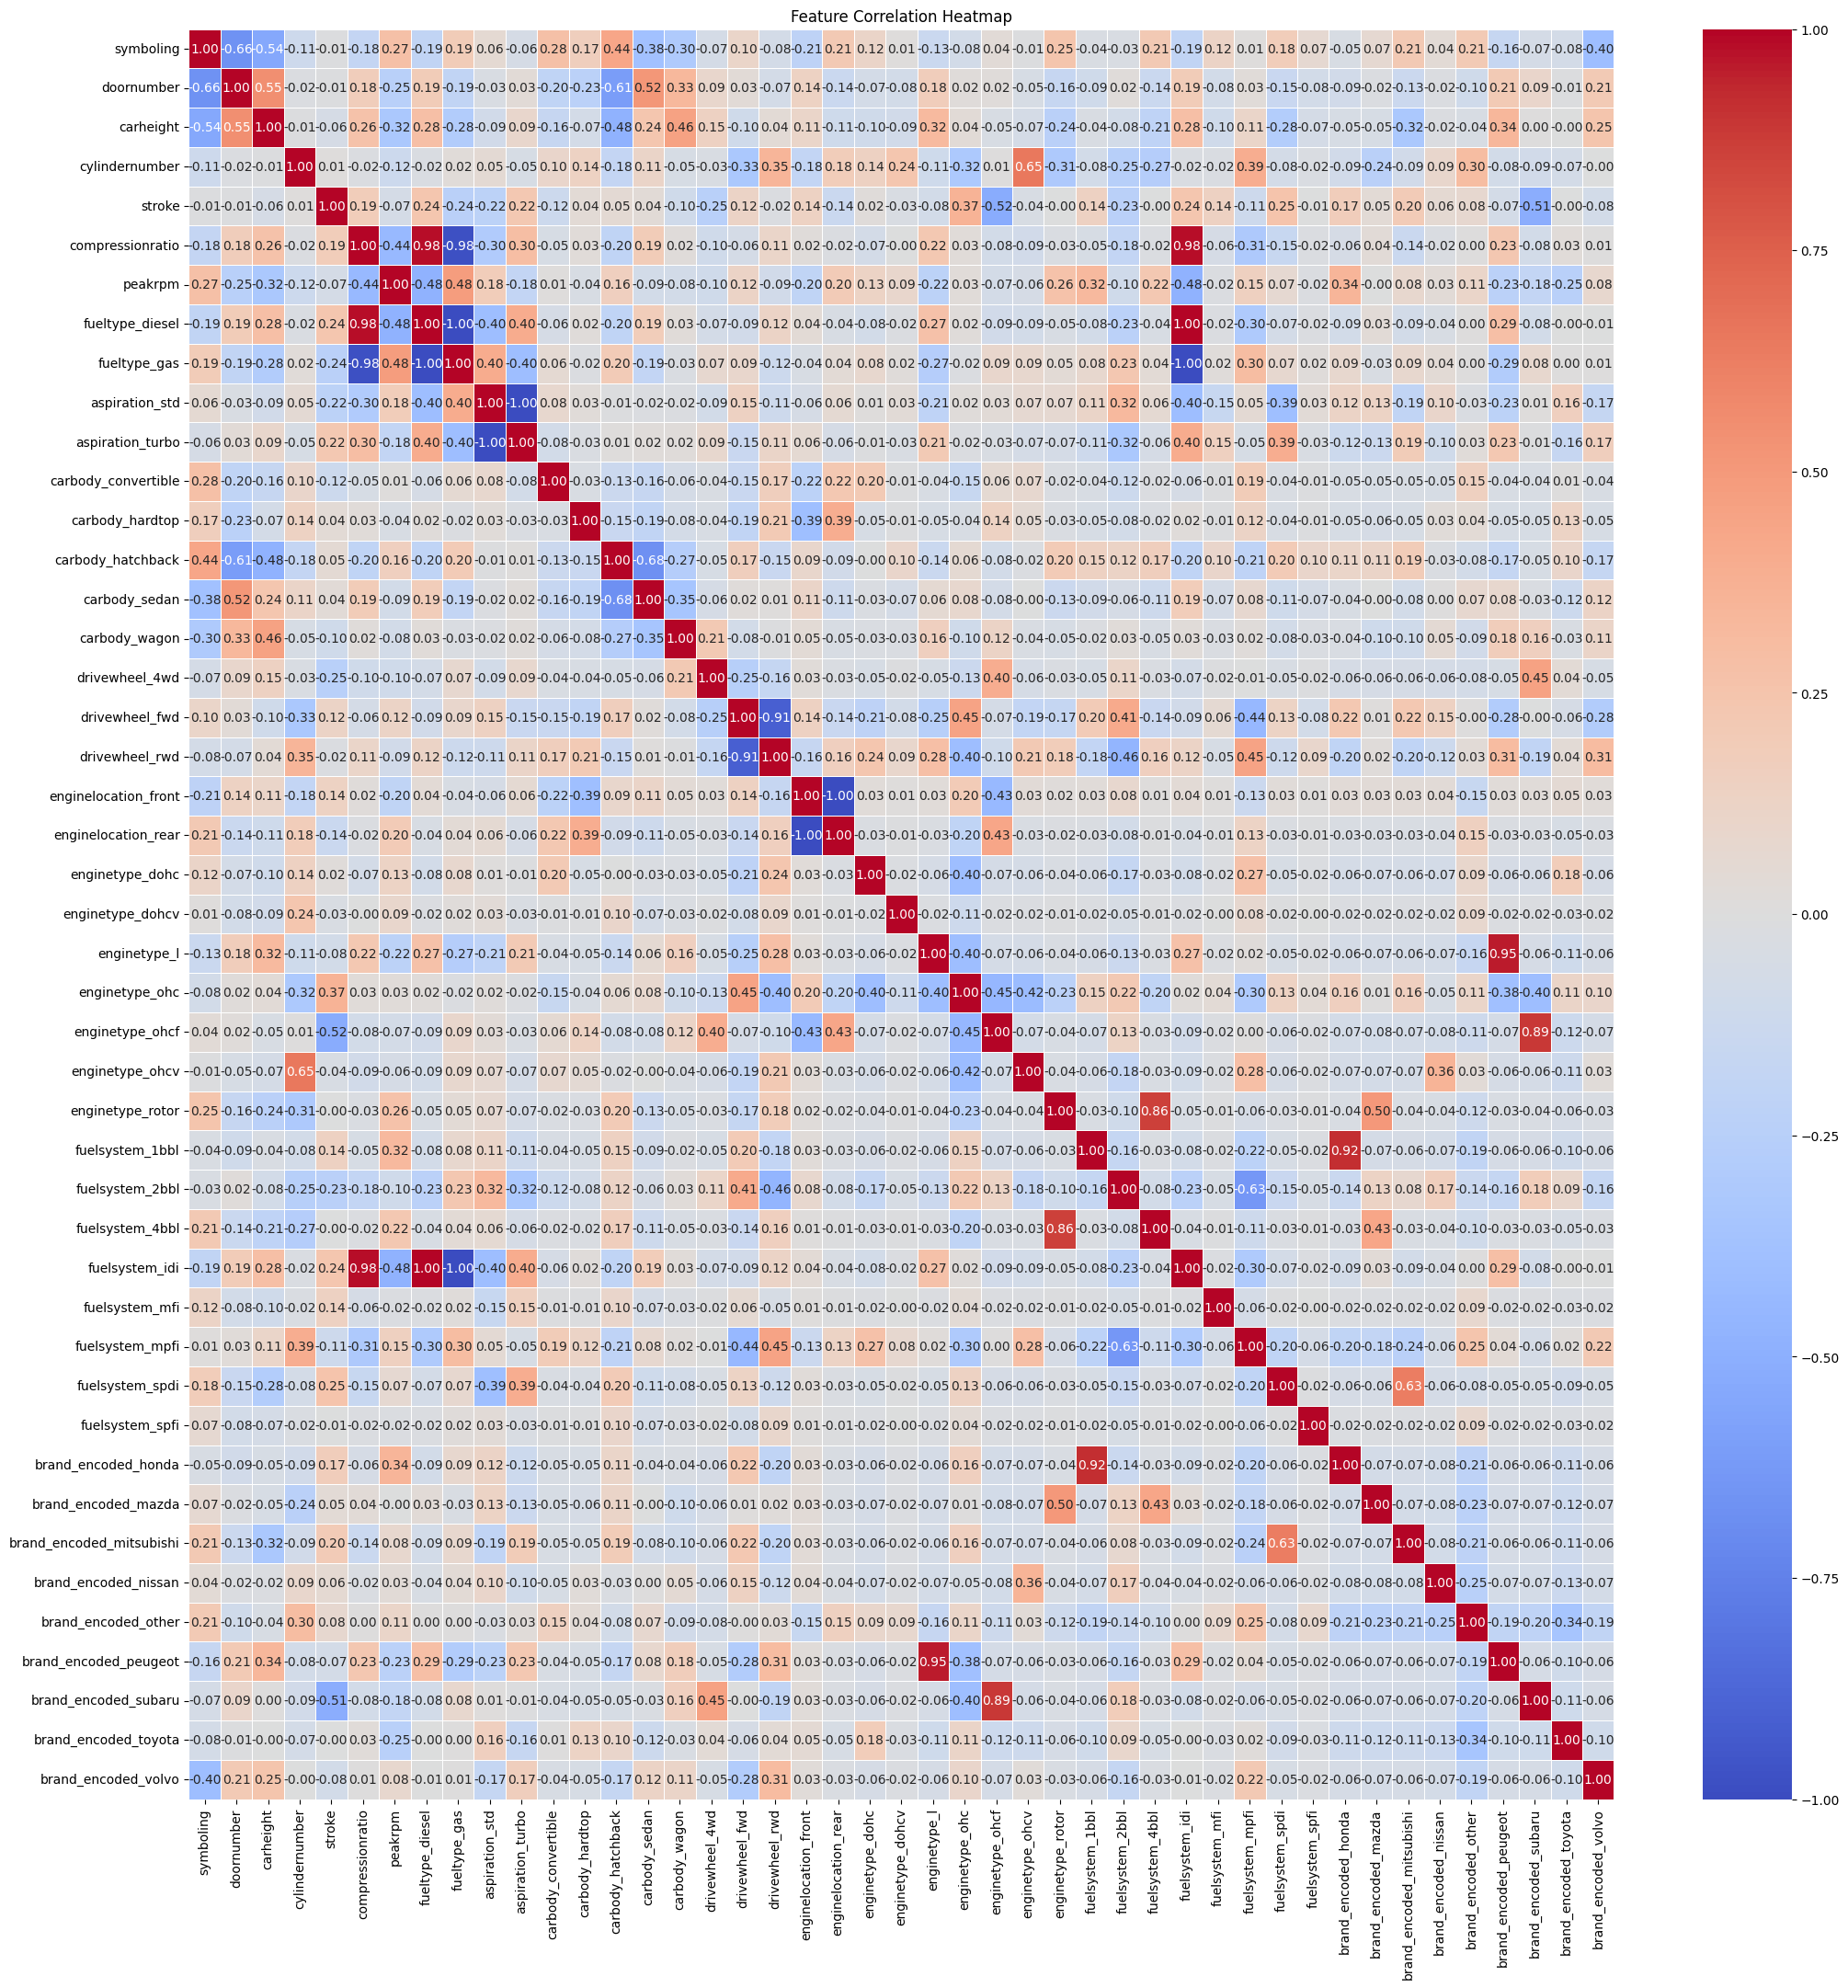

In [ ]:
# Set the size of the plot
plt.figure(figsize=(25, 25))

# Create a heatmap
sns.heatmap(X_processed.corr(),
            annot=True,  # Shows the correlation values in each cell
            fmt=".2f",   # Formats the annotation to two decimal places
            cmap='coolwarm',  # Color map to use for the heatmap
            linewidths=0.5,  # Width of the lines that will divide each cell
            cbar=True)  # Display the color bar

# Add a title to the heatmap
plt.title('Feature Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
# assumptions e.g. number of doors -> weight

In [ ]:
# need to do features selection with RFE

In [ ]:
# Employ recursive feature elimination (RFE).
#works iteratively to remove the least important feature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(LinearRegression(), n_features_to_select=15)
rfe.fit(X_processed, y)

rfe_selected_features = pd.Series(rfe.support_, index=X_processed.columns)
#rfe_selected_features = rfe_selected_features[rfe_selected_features == True].index

print(rfe_selected_features)

symboling                   False
doornumber                  False
carheight                    True
cylindernumber               True
stroke                      False
compressionratio             True
peakrpm                     False
fueltype_diesel              True
fueltype_gas                 True
aspiration_std              False
aspiration_turbo            False
carbody_convertible          True
carbody_hardtop             False
carbody_hatchback           False
carbody_sedan               False
carbody_wagon               False
drivewheel_4wd              False
drivewheel_fwd              False
drivewheel_rwd               True
enginelocation_front         True
enginelocation_rear          True
enginetype_dohc              True
enginetype_dohcv            False
enginetype_l                False
enginetype_ohc              False
enginetype_ohcf             False
enginetype_ohcv              True
enginetype_rotor             True
fuelsystem_1bbl             False
fuelsystem_2bb

In [ ]:
model1 = LinearRegression()

X_rfe_selected = X_processed.loc[:, rfe.support_]
model1.fit(X_rfe_selected, y)
model1.score(X_rfe_selected, y)

0.8255598026844514

In [ ]:
coefficients = model1.coef_
intercept = model1.intercept_

# Step 7: Construct the linear regression equation
features = X_rfe_selected.columns
equation_parts = []

for coef, feature in zip(coefficients, features):
    equation_parts.append(f"{coef:.4f} * {feature}")

equation = " + ".join(equation_parts)
full_equation = f"y = {intercept:.4f} + {equation}"

print(f"Linear Regression Equation:\n{full_equation}")

Linear Regression Equation:
y = 8226.1072 + 7256.6265 * carheight + 5427.0667 * cylindernumber + -46902.0362 * compressionratio + 13492.9547 * fueltype_diesel + -13492.9547 * fueltype_gas + 3546.3595 * carbody_convertible + 5574.4367 * drivewheel_rwd + -5506.4019 * enginelocation_front + 5506.4019 * enginelocation_rear + -602.6167 * enginetype_dohc + -4966.3121 * enginetype_ohcv + 13311.4907 * enginetype_rotor + 13492.9547 * fuelsystem_idi + -4573.5687 * brand_encoded_peugeot + -666.5095 * brand_encoded_subaru


In [ ]:
# Select features with MI score greater than a threshold, e.g., 0.1
selected_features = mi_scores[mi_scores > 0.1].index
X_selected = X[selected_features]

X_selected.head()

,stroke,carheight,cylindernumber,fuelsystem_2bbl,drivewheel_fwd,fuelsystem_mpfi,drivewheel_rwd,symboling,peakrpm,compressionratio,brand_encoded_other,enginetype_ohc
0,0.290476,0.083333,4,0.0,0.0,1.0,1.0,3,0.346939,0.1250,1.0,0.0
1,0.290476,0.083333,4,0.0,0.0,1.0,1.0,3,0.346939,0.1250,1.0,0.0
2,0.666667,0.383333,6,0.0,0.0,1.0,1.0,1,0.346939,0.1250,1.0,0.0
3,0.633333,0.541667,4,0.0,1.0,1.0,0.0,2,0.551020,0.1875,1.0,1.0
4,0.633333,0.541667,5,0.0,0.0,1.0,0.0,2,0.551020,0.0625,1.0,1.0


In [ ]:
# Import necessary library.
from sklearn.model_selection import train_test_split as tts

# Split the data into train and test data sets.
X_train_1, X_test_1, y_train, y_test = tts(X_processed, y,
                                           random_state=10)

X_train_2, X_test_2, y_train, y_test = tts(X_selected, y,
                                           random_state=10)

In [ ]:
# Compare the accuracy of the original data set, data set with MI > 0.1, and data set with MI < 0.1.
from sklearn.tree import DecisionTreeRegressor

# Use DecisionTreeRegressor for regression tasks
model_1 = DecisionTreeRegressor().fit(X_train_1, y_train)
model_2 = DecisionTreeRegressor().fit(X_train_2, y_train)

# Evaluate the regressor using R^2 score
score_1 = model_1.score(X_test_1, y_test)
score_2 = model_2.score(X_test_2, y_test)

print(f"Model 1: {score_1}\nModel 2: {score_2}")


Model 1: 0.9106176965475111
Model 2: 0.9143255127090353


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_1 = LinearRegression()

# Fit the model to the data
model_1.fit(X_selected, y)

# Evaluate the model using the R^2 score
score = model_1.score(X_selected, y)
print(f"Model R^2 score: {score}")

Model R^2 score: 0.7615933535512254


In [ ]:
# consider reducing number of features to avoid overfitting and
# multicollinearity, will also make it easier to interpret EDA Mutual
# Information - which features are actually important MI is able to measure any
# type of relationship between variables, not just linear associations (like in
# correlation coefficient)

#make target variable
X = x.drop('price', axis=1)
y = x['price']



# when target variable y is categorical use:
# from sklearn.feature_selection import mutual_info_classif


from sklearn.feature_selection import mutual_info_regression


# Define the discrete_features
discrete_features = [True if X[col].dtype == 'object' or X[col].dtype.name == 'category' else False for col in X.columns]

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)


# View the MI score. 0 indicates two variables are independent, higher values
# mean higher dependency
print(mi_scores)



curbweight                  8.610513e-01
horsepower                  8.523070e-01
highwaympg                  8.347463e-01
enginesize                  8.259345e-01
citympg                     7.347826e-01
carwidth                    6.750902e-01
carlength                   5.771970e-01
wheelbase                   5.751976e-01
boreratio                   4.590332e-01
car_ID                      4.375966e-01
stroke                      3.674434e-01
carheight                   3.459857e-01
cylindernumber              3.428619e-01
fuelsystem_2bbl             3.274632e-01
drivewheel_fwd              3.185242e-01
fuelsystem_mpfi             3.159448e-01
drivewheel_rwd              3.150165e-01
symboling                   2.061302e-01
peakrpm                     1.782844e-01
compressionratio            1.656628e-01
brand_encoded_other         1.107978e-01
enginetype_ohc              1.014345e-01
aspiration_std              9.713891e-02
aspiration_turbo            9.713891e-02
carbody_hatchbac

In [ ]:
# There is no fixed threshold for MI scores. In this demo we only keep features
# that are > 0.1 %%
''' because im using numpy-style indexing instead of pandas-style indexing???
# Find the column number of features (original data set) where MI > 0.1.
mi_score_selected_index = np.where(mi_score > 0.1)[0]

# View the columns.
print("Index numbers of features with MI > 0.1:", mi_score_selected_index)

# Create a subset of the data containing features with MI > 0.1.
X_2 = X[:, mi_score_selected_index]

# View the shape of the data.
X_2.shape
'''

# Find the column names of features (original data set) where MI > 0.1.
mi_score_selected_index = mi_scores[mi_scores > 0.1].index

# View the column names.
print("Column names of features with MI > 0.1:", mi_score_selected_index)

# Create a subset of the data containing features with MI > 0.1.
X_2 = X.loc[:, mi_score_selected_index]

# View the shape of the data.
X_2.shape

Column names of features with MI > 0.1: Index(['curbweight', 'horsepower', 'highwaympg', 'enginesize', 'citympg',
       'carwidth', 'carlength', 'wheelbase', 'boreratio', 'car_ID', 'stroke',
       'carheight', 'cylindernumber', 'fuelsystem_2bbl', 'drivewheel_fwd',
       'fuelsystem_mpfi', 'drivewheel_rwd', 'symboling', 'peakrpm',
       'compressionratio', 'brand_encoded_other', 'enginetype_ohc'],
      dtype='object')


(205, 22)

In [ ]:
X_2.head()

,curbweight,horsepower,highwaympg,enginesize,citympg,carwidth,carlength,wheelbase,boreratio,car_ID,...,cylindernumber,fuelsystem_2bbl,drivewheel_fwd,fuelsystem_mpfi,drivewheel_rwd,symboling,peakrpm,compressionratio,brand_encoded_other,enginetype_ohc
0,2548,111,27,130,21,64.1,168.8,88.6,3.47,1,...,4,0.0,0.0,1.0,1.0,3,5000,9.0,1.0,0.0
1,2548,111,27,130,21,64.1,168.8,88.6,3.47,2,...,4,0.0,0.0,1.0,1.0,3,5000,9.0,1.0,0.0
2,2823,154,26,152,19,65.5,171.2,94.5,2.68,3,...,6,0.0,0.0,1.0,1.0,1,5000,9.0,1.0,0.0
3,2337,102,30,109,24,66.2,176.6,99.8,3.19,4,...,4,0.0,1.0,1.0,0.0,2,5500,10.0,1.0,1.0
4,2824,115,22,136,18,66.4,176.6,99.4,3.19,5,...,5,0.0,0.0,1.0,0.0,2,5500,8.0,1.0,1.0


In [ ]:
#Now check for multicollinearity
#VIF (Variance Inflation Factor) score of 1 means no correlation
#VID > 5 indivaces high multicollinearity

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  # or any other model of your choice

# Original dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# X_2 dataset split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, random_state=10)

# X_3 (features with MI < 0.1)
mi_score_selected_index_3 = mi_scores[mi_scores < 0.1].index
X_3 = X.loc[:, mi_score_selected_index_3]

# X_3 dataset split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, random_state=10)

In [ ]:
# Train and evaluate on original data without stratification
# Initialize the Linear Regression model
model = LinearRegression()

# Train and evaluate on original dataset X
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_X = mean_squared_error(y_test, y_pred)
print("MSE on original dataset X:", mse_X)

# Train and evaluate on dataset X_2
model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)
mse_X_2 = mean_squared_error(y_test_2, y_pred_2)
print("MSE on X_2 (features with MI > 0.1):", mse_X_2)

# Train and evaluate on dataset X_3
model.fit(X_train_3, y_train_3)
y_pred_3 = model.predict(X_test_3)
mse_X_3 = mean_squared_error(y_test_3, y_pred_3)
print("MSE on X_3 (features with MI < 0.1):", mse_X_3)

MSE on original dataset X: 13799952.354260992
MSE on X_2 (features with MI > 0.1): 15140665.479701826
MSE on X_3 (features with MI < 0.1): 38115488.427180305


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation on original dataset X
cv_scores_X = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_X_cv = -cv_scores_X.mean()
print("Cross-validated MSE on original dataset X:", mse_X_cv)

# Cross-validation on X_2
cv_scores_X_2 = cross_val_score(model, X_2, y, cv=5, scoring='neg_mean_squared_error')
mse_X_2_cv = -cv_scores_X_2.mean()
print("Cross-validated MSE on X_2 (features with MI > 0.1):", mse_X_2_cv)

# Cross-validation on X_3
cv_scores_X_3 = cross_val_score(model, X_3, y, cv=5, scoring='neg_mean_squared_error')
mse_X_3_cv = -cv_scores_X_3.mean()
print("Cross-validated MSE on X_3 (features with MI < 0.1):", mse_X_3_cv)


Cross-validated MSE on original dataset X: 27725001.77791705
Cross-validated MSE on X_2 (features with MI > 0.1): 19588330.773332555
Cross-validated MSE on X_3 (features with MI < 0.1): 1.2323605427023844e+32


In [ ]:
# Find the counts of each class in y
counts = y.value_counts()
counts

,count
price,
8921.0,2
9279.0,2
7898.0,2
8916.5,2
7775.0,2
...,...
45400.0,1
16503.0,1
5389.0,1
